In [20]:
import pandas as pd
import numpy as np

from orbit.models import DLT
from orbit.diagnostics.plot import plot_predicted_data

In [2]:
response_df = pd.read_csv('./clean/response_df.csv', parse_dates=['date'])

In [3]:
event_df = pd.read_csv('./clean/event_df.csv', parse_dates=['date'])

In [4]:
event_cols = event_df.columns.tolist()[1:]
print(event_cols)

['NBAFinalsStart', 'NewYear', 'Eid al-Fitr', 'MemorialDay', 'Halloween', 'ValentinesDay', 'Christmas', 'LaborDay', 'SuperBowl', "Mother's day", 'MartinLutherKingDay', 'OrthodoxEaster', 'VeteransDay', 'EidAlAdha', 'Thanksgiving', 'IndependenceDay', 'Purim End', "Father's day", 'Cinco De Mayo', 'NBAFinalsEnd', 'Chanukah End', 'PresidentsDay', 'LentStart', 'ColumbusDay', 'OrthodoxChristmas', 'Easter', 'Ramadan starts', 'StPatricksDay', 'Pesach End', 'LentWeek2']


In [5]:
response_df.head(5)

,HOBBIES_1_001_CA_1,HOBBIES_1_002_CA_1,HOBBIES_1_003_CA_1,HOBBIES_1_004_CA_1,HOBBIES_1_005_CA_1,HOBBIES_1_006_CA_1,HOBBIES_1_007_CA_1,HOBBIES_1_008_CA_1,HOBBIES_1_009_CA_1,HOBBIES_1_010_CA_1,...,FOODS_3_820_WI_3,FOODS_3_821_WI_3,FOODS_3_822_WI_3,FOODS_3_823_WI_3,FOODS_3_824_WI_3,FOODS_3_825_WI_3,FOODS_3_826_WI_3,FOODS_3_827_WI_3,d,date
0,0,0,0,0,0,0,0,12,2,0,...,1,0,4,0,0,0,0,0,d_1,2011-01-29
1,0,0,0,0,0,0,0,15,0,0,...,1,0,4,0,0,6,0,0,d_2,2011-01-30
2,0,0,0,0,0,0,0,0,7,1,...,1,0,2,2,0,0,0,0,d_3,2011-01-31
3,0,0,0,0,0,0,0,0,3,0,...,1,0,5,2,0,2,0,0,d_4,2011-02-01
4,0,0,0,0,0,0,0,0,0,0,...,1,0,2,0,0,2,0,0,d_5,2011-02-02


In [8]:
hobbies_cols = response_df.columns[response_df.columns.str.contains('HOBBIES')].tolist()
df = response_df.copy()
df['hobbies_item_sales'] = response_df[hobbies_cols].sum(axis=1)
df = df.loc[:, ['date', 'hobbies_item_sales']]
df = pd.merge(df, event_df, on='date')

In [21]:
df['y'] = np.log1p(df['hobbies_item_sales'])

In [22]:
dlt = DLT(
    response_col='y',
    regressor_col=event_cols,
    date_col='date',
    seasonality=7, 
    estimator= 'stan-mcmc',
    level_sm_input=0.01)

In [23]:
dlt.fit(df)

INFO:orbit:Sampling (PyStan) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.
To run all diagnostics call pystan.check_hmc_diagnostics(fit)


In [24]:
pred = dlt.predict(df)

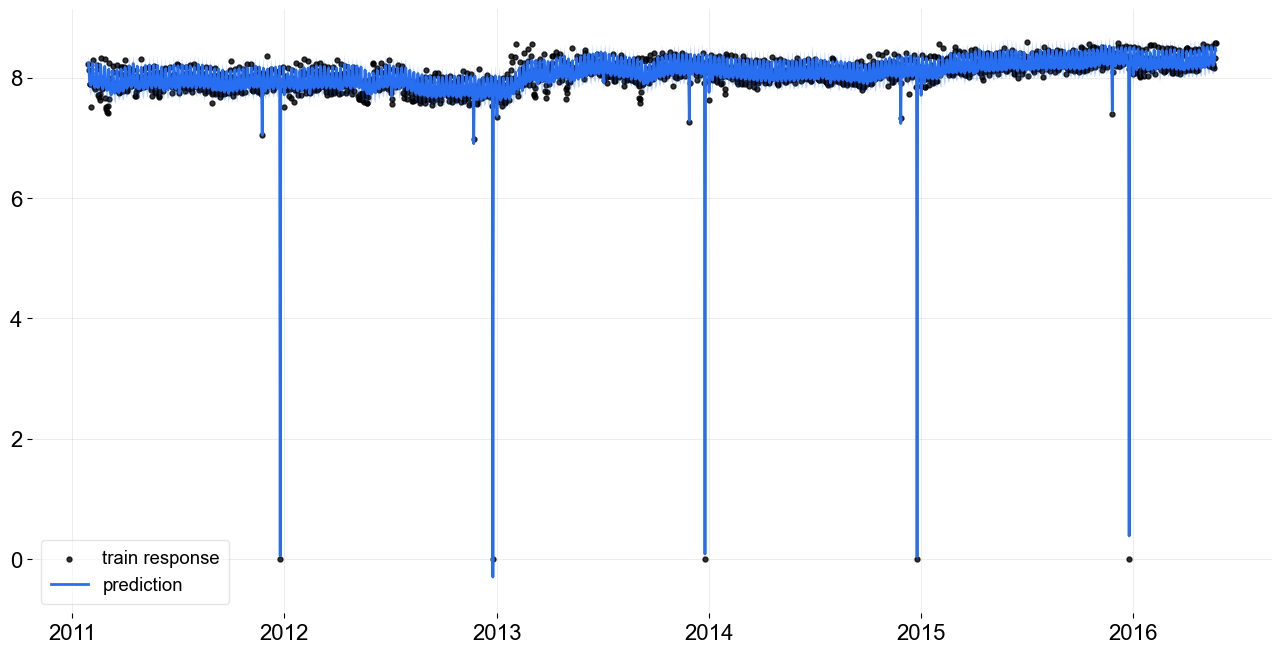

<AxesSubplot:>

In [27]:
plot_predicted_data(
    training_actual_df=df, date_col='date', actual_col='y', predicted_df=pred)

In [28]:
dlt.get_regression_coefs()

,regressor,regressor_sign,coefficient,coefficient_lower,coefficient_upper,Pr(coef >= 0),Pr(coef < 0)
0,NBAFinalsStart,Regular,0.005807,-0.036780,0.067193,0.59,0.41
1,NewYear,Regular,-0.315231,-0.381803,-0.252560,0.00,1.00
2,Eid al-Fitr,Regular,-0.029764,-0.089937,0.039006,0.19,0.81
3,MemorialDay,Regular,0.017648,-0.070941,0.080409,0.68,0.32
4,Halloween,Regular,-0.019256,-0.093283,0.076480,0.31,0.69
5,ValentinesDay,Regular,-0.085017,-0.138554,-0.032917,0.00,1.00
6,Christmas,Regular,-8.001353,-8.058050,-7.922269,0.00,1.00
7,LaborDay,Regular,0.055488,-0.031364,0.118369,0.92,0.08
8,SuperBowl,Regular,-0.059036,-0.125548,-0.010861,0.03,0.97
9,Mother's day,Regular,-0.139533,-0.194075,-0.089225,0.00,1.00
